Osnabrück University - Machine Learning (Summer Term 2024) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Lukas Niehaus

## Exercise Sheet 02: Decision Trees

## Introduction

By now everyone should have found a group. If someone still has none but wants to participate in the course please contact one of the tutors.

This week's sheet should be solved and handed in before the end of **Sunday, April 28th, 2024**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whom ever of us you run into first. Please upload your results to your group's studip folder.

# install ipympl
for the following interactive plots we use ipympl which is not installed in your environment, since it was not in the `ml.yml` file.
We can extend our ml environment by installing the packages `ipympl` and `ipywidgets` in a code cell via `pip`.
We could install it via `conda` as well but `conda` and `pip` use different sources for the packages (conda packages are usually older).
We use `pip` since the current version from `conda` is not compatable with the rest of our environment.

In [1]:
import sys
# !{sys.executable} -m pip install ipympl ipywidgets


## Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

YOUR ANSWER HERE

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

YOUR ANSWER HERE

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

YOUR ANSWER HERE

## Assignment 1: Rosner test (4 points)

The Rosner test is an iterative procedure to remove outliers of a data set via a z-test. In this exercise you will implement it and apply it to a sample data set.

### a) Outliers

First of all, think about why we use procedures like this and answer the following questions: 

What are causes for outliers? And what are our options to deal with them? 

ANSWER: Causes for outliers can be measurement errors, naturally variable data and/or an unexpected true effect. We deal with outliers by trying to detect and then removing/replacing them. The Rosner test is a method to detect outliers.


### b) Rosner test

In the following you find a stub for the implementation. The dataset is already generated. Now it is your turn to write the Rosner test and detect the outliers in the data. 

`data` is a `np.array` of `[x, y]` coordinates. `outliers` is a list of `[x, y]` coordinates.

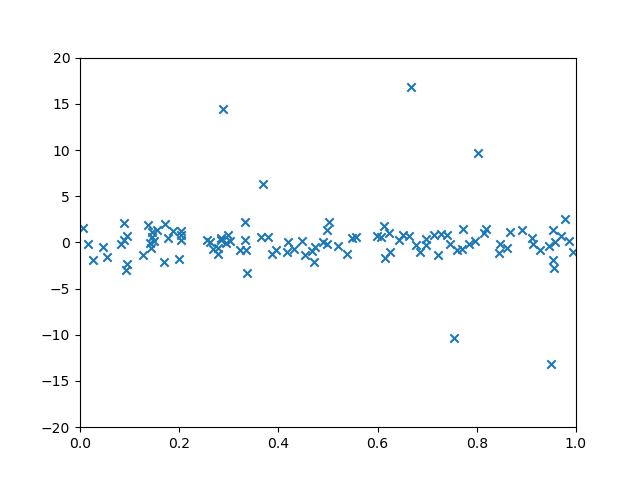

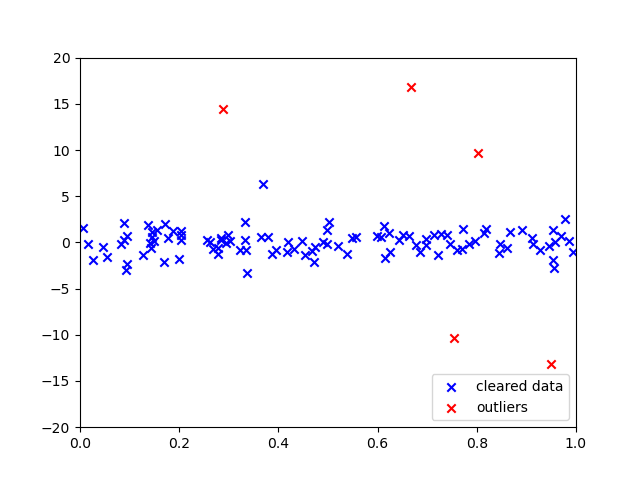

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

# generate dataset
data = list(zip(np.random.uniform(size=100), np.random.normal(size=100)))
data += list(zip(np.random.uniform(size=10), np.random.normal(0, 10, size=10)))
data = np.array(data)
outliers = []

# just to check if everything is pretty
fig_rosner_data = plt.figure('The Dataset')
plt.scatter(data[:,0], data[:,1], marker='x')
plt.axis([0, 1, -20, 20])
fig_rosner_data.canvas.draw()

# Now find the outliers, add them to 'outliers', and remove them from 'data'.
mean_data = np.mean(data[:,1])
sd_data = np.std(data[:,1])
z_data = []

for i in data[:,1]:
    z = abs(i-mean_data)/sd_data
    z_data.append(z)

outlier_indices = []

for j in range(len(z_data)):
    if(z_data[j]>3):
        outliers.append(data[j,:])
        outlier_indices.append(j)
        
data = np.delete(data, outlier_indices, axis=0)

# plot results
outliers = np.array(outliers)
fig_rosner = plt.figure('Rosner Result')
plt.scatter(data[:,0], data[:,1], c='b', marker='x', label='cleared data')
plt.scatter(outliers[:,0], outliers[:,1], c='r', marker='x', label='outliers')
plt.axis([0, 1, -20, 20])
plt.legend(loc='lower right')
fig_rosner.canvas.draw()

## Assignment 2: Expectation Maximization (2 points)

### a) What applications of the EM algorithm did you get to know in the lecture? Describe how EM treats the missing value problem.

ANSWER: Applications of the EM algorithm are for example a dataset of vectors with coordinate values but some only have an X value but no Y value (missing value problem). EM substitutes missing values by filling them artificially from an estimated distribution. The distribution will be estimated like this: The algorithm initializes the parameters theta of a chosen distribution function randomly at first and then iteratively improves the parameters. In the first E-Step it calculates the integral of log likelihoods given hidden values and non-hidden values. This obtains a function Q that  can then be maximized (M-Step) to find the new best parameters theta. Next, the Q with new theta is evaluated and if it does not suffice the convergence criterion, the E-Step and M-Step are repeated until the condition is met. Another application is in clustering and in fitting mixture models to datasets.

### b) Explain how EM algorithm can be used to fit a mixture model to a given dataset.

ANSWER: The EM algorithm can be used for building mixture models by choosing some initial mixture model parameters theta. Then iteratively calculating through the E-Step and M-Step until a criterion for how the data is supposed to be modelled is met, i.e. until convergence is detected. The improvement in the maximation step is archieved by using the a posteriori probabilities calculated in the expectation step.

## Assignment 3: Implement Expectation Maximization for Soft Clustering (8 points)

As some parts of this exercise would require some more knowledge of Python than what was already discussed in the practice sessions we built a small number of templates for you to use. However, if you prefer to do so you are also allowed to just go ahead and implement everything yourself!

Use the next cell to implement your own solution or, if you want some more guidance, skip the next cell and continue the exercise at  [Step 1) Load the data](#Step-1%29-Load-the-data).

Here is an overview of what you have to do:

**1) Load the data:**

Load the provided data set. It is stored in `em_normdistdata.txt`. We call the set $X$ and each individual data $x \in X$.

**2) Initialize EM:**

Initialize three normal distributions whose parameters will be changed iteratively by the EM to converge close to the original distributions.

Each normal distribution $j$ has three parameters: $\mu_j$ (the mean), $\sigma_j$ (the standard deviation), $\alpha_j$ (the proportion of the normal distribution in the mixture, that means $\sum\limits_j\alpha_j=1$).

Initialize the three parameters using three random partitions $S_j$ of the data set. Calculate each $\mu_j$ and $\sigma_j$ and set $\alpha_j = \frac{|S_j|}{|X|}$.

**3) Implement the expectation step:**

Perform a soft classification of the data samples with the three normal distributions. That means: Calculate the likelihood that a data sample $x_i$ belongs to distribution $j$ given parameters $\mu_j$ and $\sigma_j$. Or in other words, what is the likelihood of $x_i$ to be drawn from $N_j(\mu_j, \sigma_j)$? When you got the likelihood, weight the result by $\alpha_j$.

As a last step normalize the results such that the likelihoods of a data sample $x_i$ sum up to $1$.

**4) Implement the maximization step:**

In the maximization step each $\mu_j$, $\sigma_j$ and $\alpha_j$ is updated. First calculate the new means:

$$\mu_j = \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij}x_i$$

That means $\mu_j$ is the weighted mean of all samples, where the weight is their likelihood of belonging to distribution $j$.

Then calculate the new $\sigma_j$. Each new $\sigma_j$ is the standard deviation of the normal distribution with the new $\mu_j$, so for the calculation you already use the new $\mu_j$:

$$\sigma_j = \sqrt{ \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij} \left(x_i - \mu_j\right)^2 }$$

To calculate the new $\alpha_j$ for each distribution, just take the mean of $p_j$ for each normal distribution $j$.

**5) Perform the complete EM and plot your results:**

Build a loop around the iterative procedure of expectation and maximization which stops when the changes in all $\mu_j$ and $\sigma_j$ are sufficiently small enough.

Plot your results after each step and mark which data points belong to which normal distribution. If you don't get it to work, just plot your final solution of the distributions.

As some parts of this exercise would require some more knowledge of Python than what was already discussed in the practice sessions we built a small number of templates for you to use. However, if you prefer to do so you are also allowed to just go ahead and implement everything yourself!

Use the next cell to implement your own solution or, if you want some more guidance, skip the next cell and continue the exercise at  [Step 1) Load the data](#Step-1%29-Load-the-data).

Here is an overview of what you have to do:

**1) Load the data:**

Load the provided data set. It is stored in `em_normdistdata.txt`. We call the set $X$ and each individual data $x \in X$.

**2) Initialize EM:**

Initialize three normal distributions whose parameters will be changed iteratively by the EM to converge close to the original distributions.

Each normal distribution $j$ has three parameters: $\mu_j$ (the mean), $\sigma_j$ (the standard deviation), $\alpha_j$ (the proportion of the normal distribution in the mixture, that means $\sum\limits_j\alpha_j=1$).

Initialize the three parameters using three random partitions $S_j$ of the data set. Calculate each $\mu_j$ and $\sigma_j$ and set $\alpha_j = \frac{|S_j|}{|X|}$.

**3) Implement the expectation step:**

Perform a soft classification of the data samples with the three normal distributions. That means: Calculate the likelihood that a data sample $x_i$ belongs to distribution $j$ given parameters $\mu_j$ and $\sigma_j$. Or in other words, what is the likelihood of $x_i$ to be drawn from $N_j(\mu_j, \sigma_j)$? When you got the likelihood, weight the result by $\alpha_j$.

As a last step normalize the results such that the likelihoods of a data sample $x_i$ sum up to $1$.

**4) Implement the maximization step:**

In the maximization step each $\mu_j$, $\sigma_j$ and $\alpha_j$ is updated. First calculate the new means:

$$\mu_j = \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij}x_i$$

That means $\mu_j$ is the weighted mean of all samples, where the weight is their likelihood of belonging to distribution $j$.

Then calculate the new $\sigma_j$. Each new $\sigma_j$ is the standard deviation of the normal distribution with the new $\mu_j$, so for the calculation you already use the new $\mu_j$:

$$\sigma_j = \sqrt{ \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij} \left(x_i - \mu_j\right)^2 }$$

To calculate the new $\alpha_j$ for each distribution, just take the mean of $p_j$ for each normal distribution $j$.

**5) Perform the complete EM and plot your results:**

Build a loop around the iterative procedure of expectation and maximization which stops when the changes in all $\mu_j$ and $\sigma_j$ are sufficiently small enough.

Plot your results after each step and mark which data points belong to which normal distribution. If you don't get it to work, just plot your final solution of the distributions.

In [3]:
# Free space to implement your own solution -- either use this OR use the following step by step guide. 
# You may use scipy.stats.norm.pdf for your own implementation.





#### Step 1) Load the data


Load the provided data set. It is stored in `em_normdistdata.txt`. We call the set $X$ and each individual data $x \in X$. 

*Hint:* Figure out a way on how numpy can load text data.

In [4]:
import numpy as np

def load_data(file_name):
    """
    Loads the data stored in file_name into a numpy array.
    """
    result = None
    result = np.loadtxt(file_name)
    return result


assert load_data('em_normdistdata.txt').shape == (200,) , "The data was not properly loaded."

*Optional:* The data consists of 200 data points drawn from three normal distributions. To get a feeling for the data set you can plot the data with the following cell. Change the number of bins to get a rough idea of how the three distributions might look like.

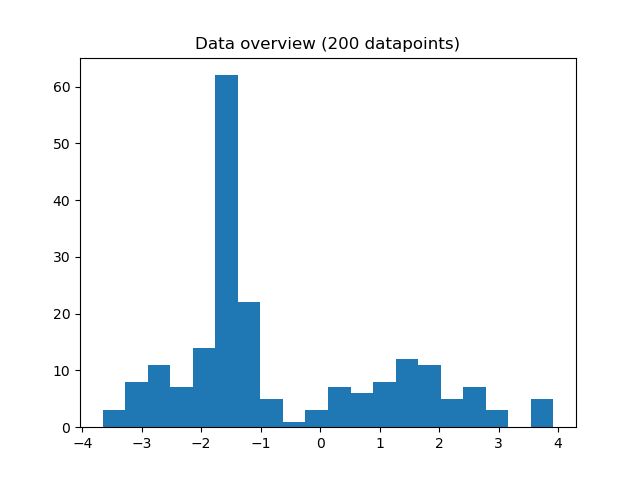

In [5]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

data = load_data('em_normdistdata.txt')
fig = plt.figure()
plt.title(f'Data overview ({len(data)} datapoints)')
# YOUR CODE HERE
# You may change the number of bins here
plt.hist(data, bins=20)
plt.show()

#### Step 2) Initialize EM

Below is a class definition `NormPDF` which represents the probability density function (pdf) of the normal distribution with an additional parameter $\alpha$. The class is explained in the next cells.

In [6]:
import numpy as np
class NormPDF():
    """
    A representation of the probability density function of the normal distribution
    for the EM Algorithm.
    """

    def __init__(self, mu=0, sigma=1, alpha=1):
        """
        Initializes the normal distribution with mean mu, standard deviation sigma 
        and proportion of the normal distribution in the mixture alpha.
        The defaults are 0, 1, and 1 respectively.
        """
        self.mu = mu
        self.sigma = sigma
        self.alpha = alpha


    def __call__(self, x):
        """
        Returns the evaluation of this normal distribution at x.
        Does not take alpha into account!
        """
        return np.exp(-(x - self.mu) ** 2 / (2 * self.sigma ** 2)) / (np.sqrt(np.pi * 2) * self.sigma)


    def __repr__(self):
        """
        A simple string representation of this instance.
        """
        return 'NormPDF({self.mu:.2f},{self.sigma:.2f},{self.alpha:.2f})'.format(self=self)
    
    def plot(self, ax):
        """
        Plot the density curve in the given Matplotlib axes object.
        """
        x = np.linspace(self.mu-4*self.sigma, self.mu+4*self.sigma, 200)
        ax.plot(x, self.alpha*self(x))

The class `NormPDF` offers several class methods: `__init__`, `__call__`, `__repr__`. They are all special Python functions which are overloaded so they can be used in a nice way. Note that all methods take as the first parameter `self`: this is just the python way of passing the instance itself to the method so that it becomes possible to access its data. You can always ignore it for now and just assume that the methods only need the parameters which follow.

`__init__`: This is the constructor. When a new instance of the class is created this method is used. It takes the parameters `mu`, `sigma`, and `alpha`. Note that if you leave out parameters, they will be set to some default values.
So you can create `NormPDF` instances like this:

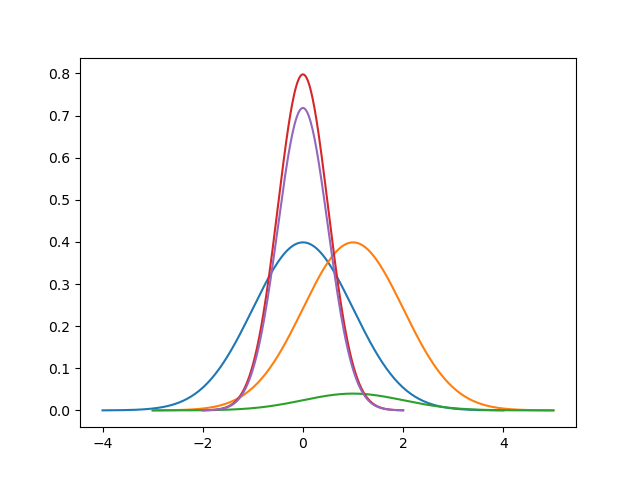

In [7]:
a = NormPDF()             # No parameters: mu = 0, sigma = 1, alpha = 1
b = NormPDF(1)            # mu = 1, sigma = 1, alpha = 1
c = NormPDF(1, alpha=0.1) # skips sigma but sets alpha, thus: mu = 1, sigma = 1, alpha = 0.4
d = NormPDF(0, 0.5)       # mu = 0, sigma = 0.5, alpha = 1
e = NormPDF(0, 0.5, 0.9)  # mu = 0, sigma = 0.5, alpha = 0.9

fig, ax = plt.subplots(1,1)
for normpdf in a, b, c, d, e:
    normpdf.plot(ax)
plt.show()

`__call__`: This is a very cool feature of Python. By implementing this method one can make an instance *callable*. That basically means one can use it as if it was a function. The `NormPDF` instances can be called with an x value (or a numpy array of x values) to get the evaluation of the normal distribution at x.

In [8]:
normpdf = NormPDF()
print(normpdf(0))
print(normpdf(0.5))
print(normpdf(np.linspace(-2, 2, 10)))

0.3989422804014327
0.3520653267642995
[0.05399097 0.11897819 0.21519246 0.31944801 0.38921247 0.38921247
 0.31944801 0.21519246 0.11897819 0.05399097]


`__repr__`: This method will be used in Python when one calls `repr(NormPDF())`. As long as `__str__` is not implemented (which you saw in assignment 3c of last week's sheet) `str(NormPDF())` will also use this method. This comes in handy for printing:

In [9]:
normpdf1 = NormPDF()
normpdf2 = NormPDF(1, 0.5, 0.9)
print(normpdf1)
print([normpdf1, normpdf2])

NormPDF(0.00,1.00,1.00)
[NormPDF(0.00,1.00,1.00), NormPDF(1.00,0.50,0.90)]


It is also possible to change the values of an instance of the NormPDF:

In [10]:
normpdf1 = NormPDF()
print(normpdf1)
print(normpdf1(np.linspace(-2, 2, 10)))

normpdf1.mu = 1
normpdf1.sigma = 2
normpdf1.alpha = 0.9
print(normpdf1)
print(normpdf1(np.linspace(-2, 2, 10)))

NormPDF(0.00,1.00,1.00)
[0.05399097 0.11897819 0.21519246 0.31944801 0.38921247 0.38921247
 0.31944801 0.21519246 0.11897819 0.05399097]
NormPDF(1.00,2.00,0.90)
[0.0647588  0.08817395 0.11427077 0.14095594 0.16549503 0.18494385
 0.19671986 0.19916355 0.19192205 0.17603266]


Now that you know how the `NormPDF` class works, it is time for the implementation of the initialization function. Here is the task again:

Write a function `gaussians = initialize_EM(data, num_distributions)` to initialize the EM.

Each normal distribution $j$ has three parameters: $\mu_j$ (the mean), $\sigma_j$ (the standard deviation), $\alpha_j$ (the proportion of the normal distribution in the mixture, that means $\sum\limits_j\alpha_j=1$).
Initialize the three parameters using three (num_distr?) random partitions $S_j$ of the data set. Calculate each $\mu_j$ and $\sigma_j$ and set $\alpha_j = \frac{|S_j|}{|X|}$.

In [11]:
import random

def initialize_EM(data, num_distributions):
    """
    Initializes the EM algorithm by calculating num_distributions NormPDFs
    from a random partitioning of data. I.e., the data set is randomly
    divided into num_distribution parts, and each part is used to initialize
    mean, standard deviation and alpha parameter of a NormPDF object.
    
    Args:
        data (array): A collection of data.
        num_distributions (int): The number of distributions to return.
        
    Returns:
        A list of num_distribution NormPDF objects, initialized from a
        random partioning of the data.
    """
    gaussians = []

    # shuffle data to create random parts across different calls of the fct
    np.random.shuffle(data)
    # split data into required groups of same len
    parts = np.array_split(data, num_distributions)
    
    # create distr
    for part in parts:
        distr = NormPDF(np.mean(part), np.std(part), 1/len(parts)) # mean, std, alpha
        gaussians.append(distr)
    

    return gaussians


normpdfs_ = initialize_EM(np.linspace(-1, 1, 100), 2)
assert len(normpdfs_) == 2, "The number of initialized distributions is not correct."

epsilon = 1e-8
assert abs(1 - sum([normpdf.alpha for normpdf in normpdfs_])) < epsilon , "Sum of all alphas is not 1.0!"

#### Step 3) Implement the expectation step

Perform a soft classification of the data samples with the normal distributions. That means: Calculate the likelihood that a data sample $x_i$ belongs to distribution $j$ given parameters $\mu_j$ and $\sigma_j$. Or in other words, what is the likelihood of $x_i$ to be drawn from $N_j(\mu_j, \sigma_j)$? When you got the likelihood, weight the result by $\alpha_j$.

As a last step normalize the results such that the likelihoods of a data sample $x_i$ sum up to $1$.

*Hint:* Store the data in a different array before you normalize it to not run into problems with partly normalized data.

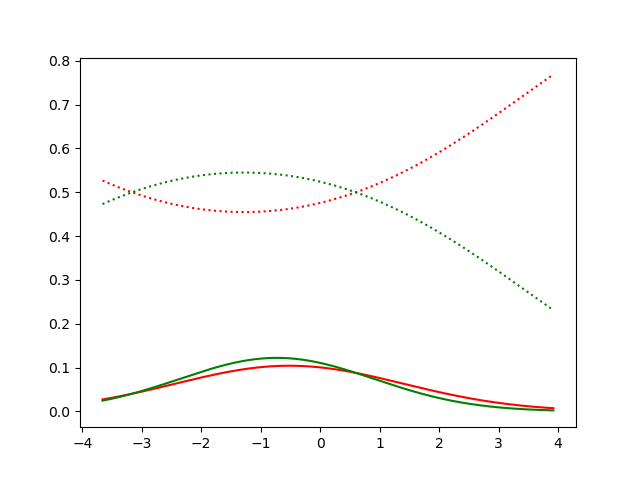

In [12]:
def expectation_step(gaussians, data):
    """
    Performs the expectation step of the EM.
    
    Args:
        gaussians (list): A list of NormPDF objects.
        data (array): The data vector.
        
    Returns:
        An array of shape (len(data), len(gaussians))
        which contains normalized likelihoods for each sample
        to denote to which of the normal distributions it 
        most likely belongs to.
    """
    expectation = np.array([])

    # iterate over all data
    for elem in data:
        probs = []
        # iterate over all distributions
        for distr in gaussians:
            # likelihood = alpha * Norm(x)
            probs.append(distr.alpha * distr(elem))
        
        # get total likelihood for that datapt
        total_non_norm_l = sum(probs)
        # normailze likelihoods by dividing by total likelihood
        norm_probs = [prob/total_non_norm_l for prob in probs]

        # add normalized likelihoods to expectation array
        expectation = np.concatenate((expectation, norm_probs), axis = 0)
    
    # reshape array to requested shape
    expectation = expectation.reshape(len(data), len(gaussians))
    
    return expectation

assert expectation_step([NormPDF(), NormPDF()], np.linspace(-2, 2, 100)).shape == (100, 2) , "Shape is not correct!"

x = np.linspace(data.min(), data.max(), 2*len(data))
normpdfs = initialize_EM(data, 2)
expectations = expectation_step(normpdfs, x)

import itertools
plt.figure()
colors = itertools.cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
for pdf, expect, color in zip(normpdfs, expectations.T, colors):
    plt.plot(x, pdf.alpha * pdf(x), color=color)
    plt.plot(x, expect, color=color, linestyle=':')
plt.show()

#### Step 4) Implement the maximization step

In the maximization step each $\mu_j$, $\sigma_j$ and $\alpha_j$ is updated. First calculate the new means:

$$\mu_j = \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij}x_i$$

That means $\mu_j$ is the weighted mean of all samples, where the weight is their likelihood of belonging to distribution $j$.

Then calculate the new $\sigma_j$. Each new $\sigma_j$ is the standard deviation of the normal distribution with the new $\mu_j$, so for the calculation you already use the new $\mu_j$:

$$\sigma_j = \sqrt{ \frac{1}{\sum\limits_{i=1}^{|X|} p_{ij}} \sum\limits_{i=1}^{|X|} p_{ij} \left(x_i - \mu_j\right)^2 }$$

To calculate the new $\alpha_j$ for each distribution, just take the mean of $p_j$ for each normal distribution $j$.

**Caution:** For the next step it is necessary to know how much all $\mu$ and $\sigma$ changed. For that the function `maximization_step` should return a numpy array of those (absolute) changes. For example if $\mu_0$ changed from 0.1 to 0.15, $\sigma_0$ from 1 to 0.9, $\mu_1$ from 0.5 to 0.6, and $\sigma_1$, $\mu_2$, and $\sigma_2$ stayed the same, we expect the function to return `np.array([0.05, 0.1, 0.1, 0, 0, 0])` (however, the order is not important).

In [13]:
def maximization_step(gaussians, data, expectation):
    """
    Performs the maximization step of the EM.
    Modifies the gaussians by updating their mus and sigmas.
    
    Args:
        gaussians (list): A list of NormPDF objects.
        data (array): The data vector.
        expectation (array): The expectation values for data element
            (as computed by expectation_step()).

    Returns:
        A numpy array of absolute changes in any mu or sigma, 
        that means the returned array has twice as many elements as
        the supplied list of gaussians.
    """
    changes = []
    
    for j, distr in enumerate(gaussians):
    ##### Means ####
        denominator = 0 #nenner
        numerator_mu = 0 #zaehler
        for i, elem in enumerate(data):
            denominator = denominator + expectation[i][j]
            numerator_mu = numerator_mu + expectation[i][j]*elem

        new_mean = numerator_mu/denominator
        delta_mean = abs(distr.mu - new_mean)

        numerator_sd = 0
        for i, elem in enumerate(data):
            numerator_sd = numerator_sd + expectation[i][j] * (elem - new_mean) * (elem - new_mean)
        
        new_sd = np.sqrt(numerator_sd / denominator)
        delta_sd = abs(distr.sigma - new_sd)

        changes.append(delta_mean)
        changes.append(delta_sd)

        new_alpha = (denominator / len(data)) / len(gaussians) # right?

        distr.mu = new_mean
        distr.sigma = new_sd
        distr.alpha = new_alpha

    return np.array(changes)

# x = np.linspace(data.min(), data.max(), 2*len(data))
# normpdfs = initialize_EM(data, 2)
# expectations = expectation_step(normpdfs, x)
# for pdf in normpdfs:
#     print(f"{pdf.mu=}, {pdf.sigma=}, {pdf.alpha=}")

# maximization_step(normpdfs, x, expectations)
# print("-------------")
# for pdf in normpdfs:
#     print(f"{pdf.mu=}, {pdf.sigma=}, {pdf.alpha=}")


**5) Perform the complete EM and plot your results:**

Initialize three normal distributions whose parameters will be changed iteratively by the EM to converge close to the original distributions.

Build a loop around the iterative procedure of expectation and maximization which stops when the changes in all $\mu_j$ and $\sigma_j$ are sufficiently small enough.

Plot your results after each step and mark which data points belong to which normal distribution. If you don't get it to work, just plot your final solution.

*Hint:* Remember to load the data and initialize the EM before the loop.

*Hint:* A function `plot_intermediate_result` to plot your result after each step is already defined in the next cell. Take a look at what arguments it takes and try to use it in your loop.

*Hint:* To plot your final result the first three images and corresponding code examples on the tutorial of [`plt.plot(...)`](http://matplotlib.org/users/pyplot_tutorial.html) should help you.

*Optional:* Run the code multiple times. If your results are changing, use `np.random.seed(2)` in the beginning of the cell to get consistent results (any other integer will work as well, but 2 has some good results for the example solutions).

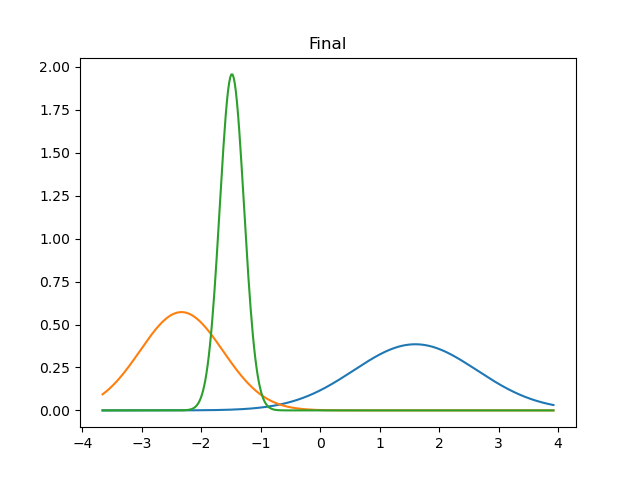

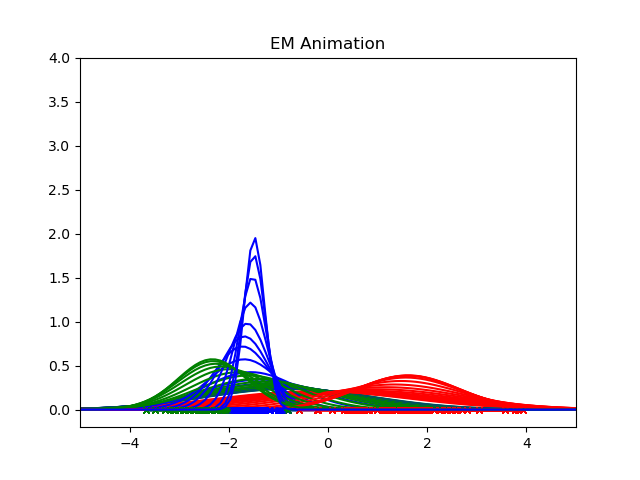

In [26]:
%matplotlib ipympl
import itertools
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# Sets the random seed to a fix value to make results consistent
np.random.seed(2)

figure, axis = plt.subplots(1)
axis.set_xlim(-5, 5)
axis.set_ylim(-0.2, 4)
axis.set_title('EM Animation')

# Perform the initialization.
data = load_data('em_normdistdata.txt')
gaussians = initialize_EM(data, 3) # 3 norm distr

def update_plot(gaussians, data, mapping):
    """
    Gets a list of gaussians and data input. The mapping
    parameter is a list of indices of gaussians. Each value
    corresponds to the data value at the same position and 
    maps this data value to the proper gaussian.
    """
    x = np.linspace(-5, 5, 100)
    colors = itertools.cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
    plots = []
    #container = plt.plot(x, gaussians[0](x), 'r', x, gaussians[1](x), 'g', x, gaussians[2](x), 'b')
    for j, (N, color) in enumerate(zip(gaussians, colors)):
        plots.append(plt.plot(x, gaussians[j](x), color)[0])
        plots.append(plt.plot(data[mapping == j], [0] * len(data[mapping == j]), color, marker='x', markersize=5)[0])
    return plots

# Loop until the changes are small enough.
eps = 0.05
changes = [float('inf')] * 2
artists = []  # for animation
while max(changes) > eps:
    # Iteratively apply the expectation step, followed by the maximization step.
    
    expectation = expectation_step(gaussians, data)
    changes = maximization_step(gaussians, data, expectation)

    # Optional: Calculate the parameters to update the plot.
    artists.append(update_plot(gaussians, data, np.argmax(expectation, 1)))

ani = animation.ArtistAnimation(fig=figure, artists=artists, interval=400)

final, final_axes = plt.subplots(1)
final_axes.set_title("Final")
for distr in gaussians:
    final_axes.plot(x, distr(x))


#final.set_title("Final")

plt.show()

# Assignment 4: Soft Clustering with Gaussian Mixture (6 points)

In this assignment you will calculate the update rules for a Gaussian Mixture model required for the M-step of the EM algorithm. The Gaussian Mixture model can be used for soft clustering since it allows us to express varying degrees of certainty about the membership of individual samples. It is one of the most widely used models since Gaussian distributions generally have the property of fitting all different kinds of data reasonably well.

A mixture model with $K$ components is in general of the form:

$$ p(\mathbf{x}|\mathbf{\theta}) = \sum_{k=1}^K\alpha_kp_k(\mathbf{x}|\mathbf{\theta}_k)$$
where $\sum_{k=1}^K\alpha_k = 1$.

This means that the probability of observing a dataset $\mathbf{x}$ given the parameter vector $\mathbf{\theta}$ can be expressed as the sum of $K$ individual distributions $p_k$ with parameters $\mathbf{\theta}_k \subseteq {\theta}$ which are weighted by respective class probabilities $\alpha_k$. The probability for individual data $x_i \in \textbf{x}$ is calculated correspondingly (note however, that of course the values for individual data differs from the overall probability). 

We can now choose distributions for $p_k$ and $\alpha_k$ and we get a whole collection full of different possible models, each of which has its own advantages and disadvantages (you can check <a href='https://en.wikipedia.org/wiki/Mixture_model'>Wikipedia</a> if you want an overview). The easiest case is where our mixing distributions are normally distributed, $p_k \sim \mathcal{N}(\mu_k,\sigma_k)$, and our latent class probabilities have a discrete distribution where we only have $\alpha_k \in [0,1]$ and the constraint $\sum_k\alpha_k=1$.

If we were to randomly pick values for the parameter vector $\theta$ then we would now have a generative model that can produce naturally clustered data for us, we would just have to sample $\hat{x} \sim p(\mathbf{x}|\mathbf{\theta})$. However, we want to go into the opposite direction and figure out what the distribution of the labels given the data is. This can be calculated easily by Bayes' Theorem for each model $k$, where the (latent) probability for choosing model $k$ is $p(k|\mathbf{\theta}_k) = \alpha_k$:

$$p(k|\mathbf{x},\mathbf{\theta})=\frac{p(k|\mathbf{\theta}_k)p(\mathbf{x}|k,\mathbf{\theta}_k)}{\sum_{k'=1}^Kp(k'|\mathbf{\theta}_{k'})p(\mathbf{x}|k',\mathbf{\theta}_{k'})} = \frac{\alpha_kp_k(\mathbf{x}|\mathbf{\theta}_k)}{\sum_{k'=1}^K\alpha_{k'}p_{k'}(\mathbf{x}|\mathbf{\theta}_{k'})}$$

That sounds good enough, but where do we actually start now? We have a mathematical framework pinned down, but it contains many variables and it is not *a priori* obvious how we can figure out the best values for them. We *have* some data which we want to use to determine the parameters so the usual approach would be to simply calculate a Maximum Likelihood Estimator (MLE) or an Maximum A Posteriori Estimator (MAP) by maximizing the above formulas over the possible parameters with a method like Gradient Descent. It turns out however that this is very, very hard to do (optimal MLE for a GMM is NP-hard (Aloise et al. 2009; Drineas et al. 2004)) since the $\alpha_k$ and the $\theta_k$ are strongly interdependent and neither is known. It *can* still be done with some work-arounds, but there is also an alternative path that we can go down.

*(The following exhibition is only for those who are interested in the mathematical background of the EM-algorithm, those who only want to solve the exercise can skip ahead to the function that you have to maximize.)*

We want to maximize the log likelihood given as
$$\mathcal{\ell}(\mathbf{\theta})=\sum_{i=1}^N\log p(x_i|\mathbf{\theta}) = \sum_{i=1}^N\log\left[\sum_{k=1}^Kp_k(x_i|\mathbf{\theta}_k)\right].$$
All the problems occur because we have a sum inside the logarithm and so we can't pull the logarithm further in towards the densitiy and that is what makes the problem so hard. If we just *ignore* the inner sum we get an expression
$$\mathcal{\ell}_c(\mathbf{\theta}) = \sum_{i=1}^N\log p_k(x_i|\mathbf{\theta}_k)$$
which would be much nicer to compute. But now we have a free floating $k$ in the subscript of our density! Which one of the mixing distributions are we talking about here? Kind of all of them at once. But we need one quantity to represent all the distributions. So to get rid of the $k$ we take the expected value with respect to the latent variable $k$ and receive a function that only depends on $\mathbf{\theta}$:
$$Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right) = \mathbb{E}\left[\mathcal{\ell}_c\left(\mathbf{\theta}\middle|\mathcal{\theta}^{t-1}\right)\right]$$

Calculating this $Q$ function can be difficult - but at least we only have to do it once instead of solving an NP-hard optimization problem every time we have a new dataset. We will only provide you the final formula, you will have to trust us on this one:

$$\begin{align}
Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right) &= \sum_i\sum_k p\left(k\middle|x_i,\mathbf{\theta}^{t-1}\right)\log\alpha_k + \sum_i\sum_k p\left(k\middle|x_i,\mathbf{\theta}^{t-1}\right)\log p_k\left(x_i\middle|\mathbf{\theta}\right)
\end{align}$$

This still looks nasty but it really isn't that bad! Since $\theta^{t-1}$ is known at time $t$ we can calculate $p\left(k\middle|x_i,\mathbf{\theta}^{t-1}\right)$ with Bayes' Theorem as stated above and replace these expressions with constants $r_{i,k}.$

**This is where your work begins:**

$\DeclareMathOperator*{\argmax}{arg\,max}$
In the lecture you saw a proof that if we choose
$$\mathbf{\theta}^t = \argmax_{\mathbf{\theta}} Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right)$$
that the likelihood of the parameter is non-decreasing then. So we want to maximize $Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right)$ for the parameters $\left(\alpha_1\dots,\alpha_K\right)$ and $\theta = \left(\mu_1,\dots,\mu_K,\sigma_1,\dots,\sigma_K\right)$. So your job is to take the derivative of 
$$\begin{align}
Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right) &= \sum_i\sum_k r_{i,k}\log\alpha_k + \sum_i\sum_k r_{i,k}\log p_k\left(x_i\middle|\mathbf{\theta}\right)
\end{align}$$
with respect to these variables, to set it equal to 0 and to solve for the value that you are currently maximizing for. You only have to do this for the one dimensional case, i.e. 
$$p_k(x_i|\mathbf{\theta}_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}}\exp\left({-\frac{\left(x_i-\mu_k\right)^2}{2\sigma_k^2}}\right)$$

## a) Calculate the maximizer for the $\mu_k$:

*Hint:* derive $Q(\theta,\theta^{t-1})$ with respect $\mu_{k}$ and set the derivative to $0$ to get an optimal value for $\mu_k$.  You do not need to form the second derivative to check for that being a maximum.

YOUR ANSWER HERE

## b) Calculate the maximizer for the $\sigma_k^2$:

*Hint:* now derive $Q(\theta,\theta^{t-1})$ with respect $\sigma_{k}^{2}$.

YOUR ANSWER HERE

## c) Calculate the maximizer for the $\alpha_k$ 

You need the ensure $\sum_k\alpha_k =1$. You can either use the formula to express one of the $\alpha_i$ in terms of all the others or use a Lagrangian Multiplier for this.

Hint: using a Lagrangian Multiplier, you would start with an equation like this:
$$\frac{\partial}{\partial \alpha_k}\left(Q\left(\mathbf{\theta},\mathbf{\theta}^{t-1}\right) - \lambda \left(\sum_k \alpha_k - 1\right)\right) = 0$$
Some brief introduction to Langrangian multipliers can be found in Bishop (2006): *Pattern Recognition and Machine Learning*, Appendix E.

YOUR ANSWER HERE